# Boxplot ML performance

In [19]:
import pandas as pd
from pathlib import Path
import seaborn as sbn
import matplotlib.pyplot as plt

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

project_root = Path().resolve().parents[1]

results_base = project_root / "output" / "ML"

# 10 age bins

In [20]:
N_age_bins = 10

results_dir = results_base / "pooled_data" / ("N_bins_" + str(N_age_bins))
# Load data random pooled AOMIC 1000brain
results_pooled_high_low = pd.read_csv(
    results_dir
    / ("results_" + str(N_age_bins) + "_bins_pooled_data_high_low_sampling_Q.csv"),
    index_col=0,
)

results_pooled_high_low = results_pooled_high_low[
    results_pooled_high_low["Model"] == "Pooled data Test"
]
results_pooled_high_low["Site"] = "Pooled"


# Load data from single sites experiment
results_dir = results_base / "single_site" / ("N_bins_" + str(N_age_bins))

results_single_site_high_low = pd.read_csv(
    results_dir
    / ("results_" + str(N_age_bins) + "_bins_single_site_high_low_sampling_Q.csv"),
    index_col=0,
)
results_single_site_high_low = results_single_site_high_low[
    results_single_site_high_low["Model"] == "Single site Test"
]


In [21]:
results_dir = results_base / "pooled_data" / ("N_bins_" + str(N_age_bins))

# Load data random pooled AOMIC 1000brain
results_pooled_random_Q = pd.read_csv(
    results_dir
    / ("results_" + str(N_age_bins) + "_bins_pooled_data_random_Q_20_repetitions.csv"),
    index_col=0,
)
results_pooled_random_Q = results_pooled_random_Q[
    results_pooled_random_Q["Model"] == "Pooled data Test"
]
results_pooled_random_Q["Site"] = "Pooled"
results_pooled_random_Q["QC_Sampling"] = "random_Q"


# Load data from single sites experiment
results_dir = results_base / "single_site" / ("N_bins_" + str(N_age_bins))

results_single_random_Q = pd.read_csv(
    results_dir
    / (
        "results_"
        + str(N_age_bins)
        + "_bins_single_site_random_sampling_Q_20_repetitions.csv"
    ),
    index_col=0,
)
results_single_random_Q = results_single_random_Q[
    results_single_random_Q["Model"] == "Single site Test"
]


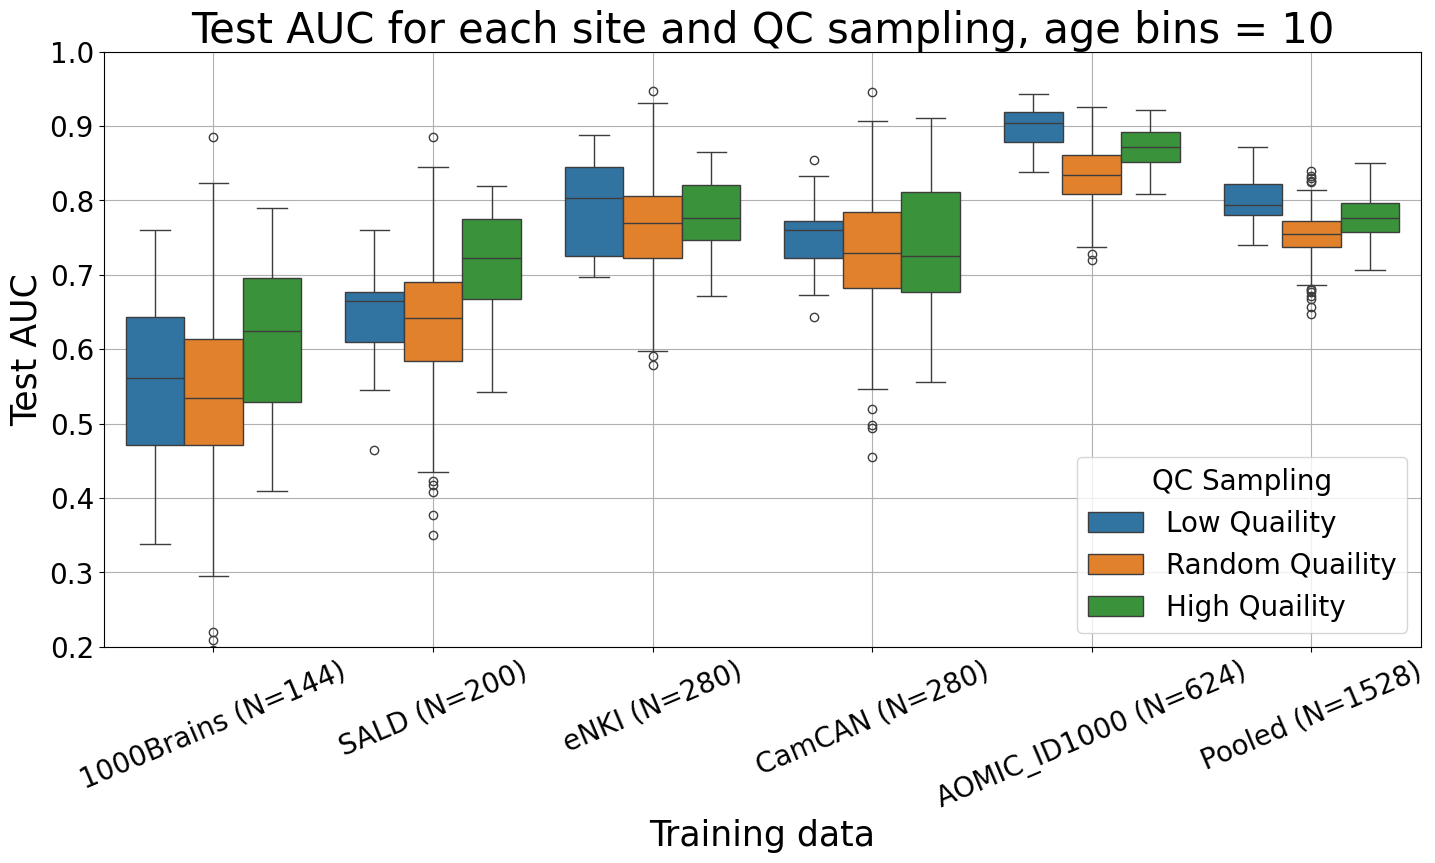

In [22]:
combined_results = pd.concat(
    [
        results_single_site_high_low,
        results_pooled_high_low,
        results_single_random_Q,
        results_pooled_random_Q,
    ]
)
order = ["Low Quaility", "Random Quaility", "High Quaility"]
site_list = [
    "1000Brains (N=144)",
    "SALD (N=200)",
    "eNKI (N=280)",
    "CamCAN (N=280)",
    "AOMIC_ID1000 (N=624)",
    "Pooled (N=1528)",
]
metric_to_plot = "AUC"
combined_results.replace(
    {
        "QC_Sampling": {
            "low_Q": "Low Quaility",
            "high_Q": "High Quaility",
            "random_Q": "Random Quaility",
        },
        "Site": {
            "1000Brains": "1000Brains (N=144)",
            "SALD": "SALD (N=200)",
            "eNKI": "eNKI (N=280)",
            "CamCAN": "CamCAN (N=280)",
            "AOMIC_ID1000": "AOMIC_ID1000 (N=624)",
            "Pooled": "Pooled (N=1528)",
        },
    },
    inplace=True,
)
combined_results.rename(columns={"QC_Sampling": "QC Sampling"}, inplace=True)
plt.figure(figsize=(17, 17))
plt.subplot(2, 1, 1)

sbn.boxplot(
    data=combined_results,
    x="Site",
    order=site_list,
    y=metric_to_plot,
    hue="QC Sampling",
    hue_order=order,
)
plt.grid()
plt.ylim([0.2, 1])
plt.xlabel("Training data")
plt.xticks(rotation=23)
plt.ylabel("Test AUC")
plt.title("Test AUC for each site and QC sampling, age bins = " + str(N_age_bins))
plt.show()

# 3 age bins

In [23]:
N_age_bins = 3

results_dir = results_base / "pooled_data" / ("N_bins_" + str(N_age_bins))
# Load data random pooled AOMIC 1000brain
results_pooled_high_low = pd.read_csv(
    results_dir
    / ("results_" + str(N_age_bins) + "_bins_pooled_data_high_low_sampling_Q.csv"),
    index_col=0,
)

results_pooled_high_low = results_pooled_high_low[
    results_pooled_high_low["Model"] == "Pooled data Test"
]
results_pooled_high_low["Site"] = "Pooled"


# Load data from single sites experiment
results_dir = results_base / "single_site" / ("N_bins_" + str(N_age_bins))

results_single_site_high_low = pd.read_csv(
    results_dir
    / ("results_" + str(N_age_bins) + "_bins_single_site_high_low_sampling_Q.csv"),
    index_col=0,
)
results_single_site_high_low = results_single_site_high_low[
    results_single_site_high_low["Model"] == "Single site Test"
]


In [24]:
N_age_bins = 3

results_dir = results_base / "pooled_data" / ("N_bins_" + str(N_age_bins))
# Load data random pooled AOMIC 1000brain
results_pooled_random_Q = pd.read_csv(
    results_dir
    / ("results_" + str(N_age_bins) + "_bins_pooled_data_random_Q_20_repetitions.csv"),
    index_col=0,
)
results_pooled_random_Q = results_pooled_random_Q[
    results_pooled_random_Q["Model"] == "Pooled data Test"
]
results_pooled_random_Q["Site"] = "Pooled"
results_pooled_random_Q["QC_Sampling"] = "random_Q"

# Load data from single sites experiment
results_dir = results_base / "single_site" / ("N_bins_" + str(N_age_bins))

results_single_random_Q = pd.read_csv(
    results_dir
    / (
        "results_"
        + str(N_age_bins)
        + "_bins_single_site_random_sampling_Q_20_repetitions.csv"
    ),
    index_col=0,
)
results_single_random_Q = results_single_random_Q[
    results_single_random_Q["Model"] == "Single site Test"
]


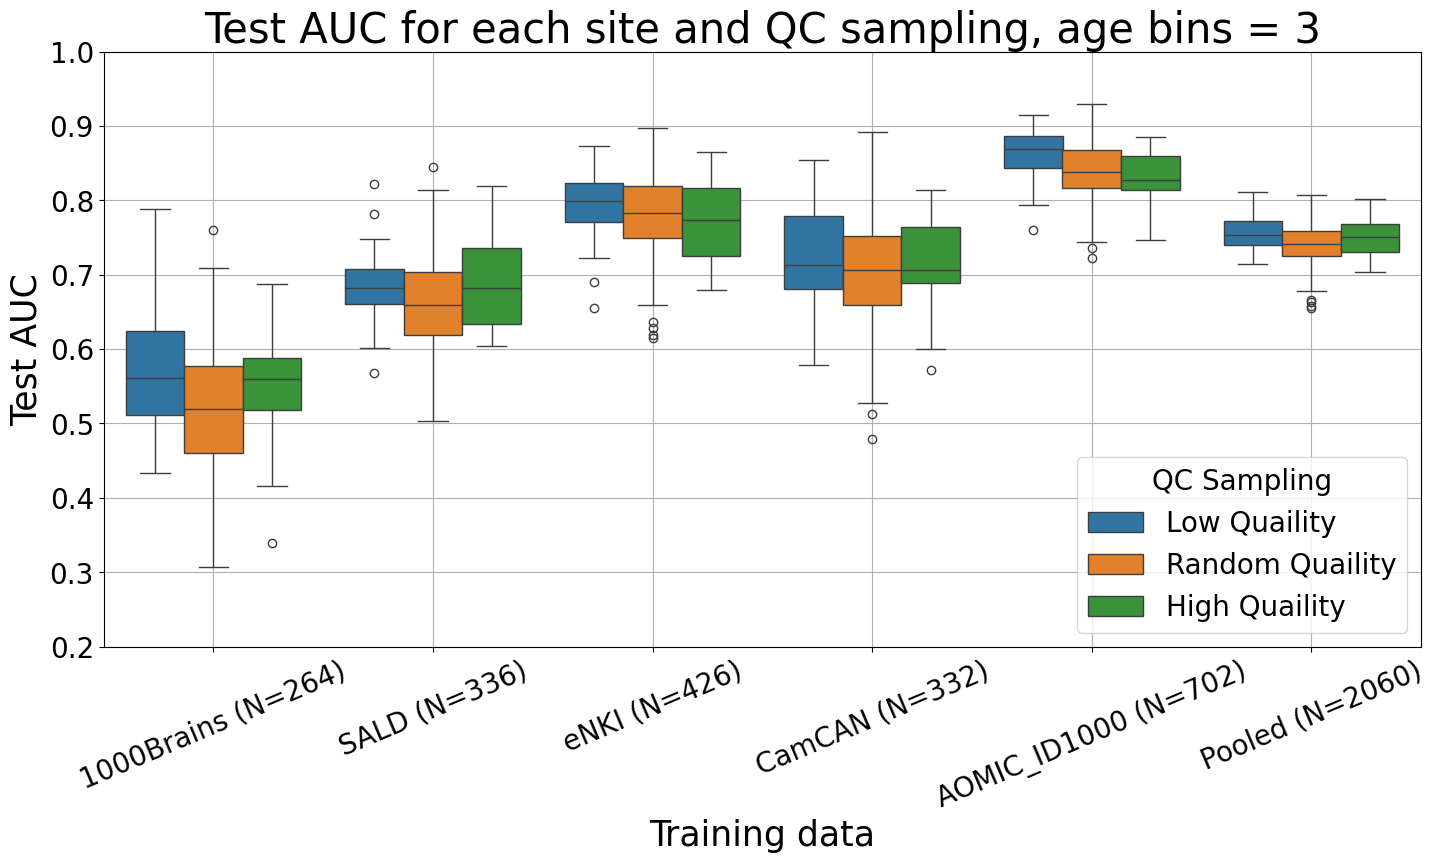

In [25]:
combined_results = pd.concat(
    [
        results_single_site_high_low,
        results_pooled_high_low,
        results_single_random_Q,
        results_pooled_random_Q,
    ]
)
order = ["Low Quaility", "Random Quaility", "High Quaility"]
site_list = [
    "1000Brains (N=264)",
    "SALD (N=336)",
    "eNKI (N=426)",
    "CamCAN (N=332)",
    "AOMIC_ID1000 (N=702)",
    "Pooled (N=2060)",
]
metric_to_plot = "AUC"
combined_results.replace(
    {
        "QC_Sampling": {
            "low_Q": "Low Quaility",
            "high_Q": "High Quaility",
            "random_Q": "Random Quaility",
        },
        "Site": {
            "1000Brains": "1000Brains (N=264)",
            "SALD": "SALD (N=336)",
            "eNKI": "eNKI (N=426)",
            "CamCAN": "CamCAN (N=332)",
            "AOMIC_ID1000": "AOMIC_ID1000 (N=702)",
            "Pooled": "Pooled (N=2060)",
        },
    },
    inplace=True,
)
combined_results.rename(columns={"QC_Sampling": "QC Sampling"}, inplace=True)
plt.figure(figsize=(17, 17))
plt.subplot(2, 1, 1)

sbn.boxplot(
    data=combined_results,
    x="Site",
    order=site_list,
    y=metric_to_plot,
    hue="QC Sampling",
    hue_order=order,
)
plt.grid()
plt.ylim([0.2, 1])
plt.xlabel("Training data")
plt.xticks(rotation=23)
plt.ylabel("Test AUC")
plt.title("Test AUC for each site and QC sampling, age bins = " + str(N_age_bins))
plt.show()